# **Ex.1 Gender Identification**

Names corpus, containing 8,000 first names categorized by gender. The male and female names are stored in separate files. 

---

### **Dataset**

In [2]:
import nltk
nltk.download('names')
from nltk.corpus import names
labeled_names = ([(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')])
import random
random.shuffle(labeled_names)


[nltk_data] Downloading package names to /content/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


### **Design Features**

In [0]:
def gender_features(word):
  return {'last_letter': word[-1]}

In [4]:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
print(featuresets[:3])
print(featuresets[-3:])

[({'last_letter': u'e'}, 'female'), ({'last_letter': u'n'}, 'male'), ({'last_letter': u'l'}, 'male')]
[({'last_letter': u's'}, 'male'), ({'last_letter': u'a'}, 'female'), ({'last_letter': u'g'}, 'male')]


When working with large corpora, constructing a single list that contains the features of every instance can use up a large amount of memory. In these
cases, use the function nltk.classify.apply_features, which returns an object that acts like a list but does not store all the feature sets in memory:  
```
# Option 2
from nltk.classify import apply_features
train_set = apply_features(gender_features, labeled_names[500:])
test_set = apply_features(gender_features, labeled_names[:500])

```



## **Naive Bayes Classifier**



In [0]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

The training set is used to train a new "naive Bayes" classifier.  
Let's just test it out on some names from *The Avengers*. The names that did not appear in its training data:

```
# Just for fun
classifier.classify(gender_features('Rogers'))
classifier.classify(gender_features('Gamora'))
```



### ** Evaluate**
 

We can systematically evaluate the classifier on a much larger quantity of unseen data(Test_set)

In [6]:
print(nltk.classify.accuracy(classifier, test_set))

0.758


To determine which features it found most effective for distinguishing the names' genders. This listing shows that the names in the training set that end in "a" are female 38 times more often than they are male, but names that end in "k" are
male 31 times more often than they are female. These ratios are known as ***likelihood ratios***, and can be useful for comparing different feature-outcome
relationships. 

In [36]:
classifier.show_most_informative_features(30)

Most Informative Features
             last_letter = u'a'           female : male   =     33.0 : 1.0
             last_letter = u'k'             male : female =     30.7 : 1.0
             last_letter = u'f'             male : female =     26.2 : 1.0
             last_letter = u'p'             male : female =     19.2 : 1.0
             last_letter = u'z'             male : female =     11.1 : 1.0
             last_letter = u'd'             male : female =      9.7 : 1.0
             last_letter = u'o'             male : female =      8.1 : 1.0
             last_letter = u'm'             male : female =      8.0 : 1.0
             last_letter = u'v'             male : female =      7.3 : 1.0
             last_letter = u'r'             male : female =      6.7 : 1.0
             last_letter = u'g'             male : female =      5.4 : 1.0
             last_letter = u'w'             male : female =      4.6 : 1.0
             last_letter = u's'             male : female =      4.4 : 1.0

Note : Data Explore A conditional frequency distribution needs to pair each event with a condition. Each pair has the form (condition, event).


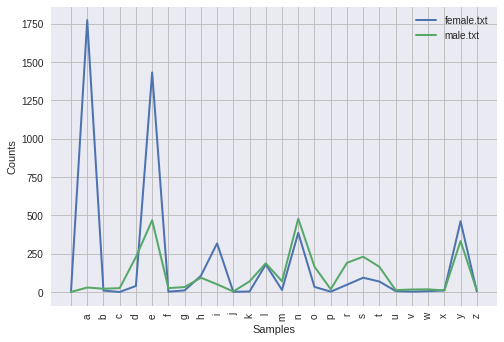

In [8]:
cfd = nltk.ConditionalFreqDist((fileid, name[-1]) for fileid in names.fileids() for name in names.words(fileid))
cfd.plot()

### ***Test Encoding More Features***: 

*   Length of the name 
*   First letter

*   Last letter
*   etc.


In [0]:
def gender_features2(name):
  features = {}
  features["first_letter"] = name[0].lower()
  features["last_letter"] = name[-1].lower()
  for letter in 'abcdefghijklmnopqrstuvwxyz':
    features["count({})".format(letter)] = name.lower().count(letter)
    features["has({})".format(letter)] = (letter in name.lower())
  return features

In [10]:
gender_features2('Tony')

{'count(a)': 0,
 'count(b)': 0,
 'count(c)': 0,
 'count(d)': 0,
 'count(e)': 0,
 'count(f)': 0,
 'count(g)': 0,
 'count(h)': 0,
 'count(i)': 0,
 'count(j)': 0,
 'count(k)': 0,
 'count(l)': 0,
 'count(m)': 0,
 'count(n)': 1,
 'count(o)': 1,
 'count(p)': 0,
 'count(q)': 0,
 'count(r)': 0,
 'count(s)': 0,
 'count(t)': 1,
 'count(u)': 0,
 'count(v)': 0,
 'count(w)': 0,
 'count(x)': 0,
 'count(y)': 1,
 'count(z)': 0,
 'first_letter': 't',
 'has(a)': False,
 'has(b)': False,
 'has(c)': False,
 'has(d)': False,
 'has(e)': False,
 'has(f)': False,
 'has(g)': False,
 'has(h)': False,
 'has(i)': False,
 'has(j)': False,
 'has(k)': False,
 'has(l)': False,
 'has(m)': False,
 'has(n)': True,
 'has(o)': True,
 'has(p)': False,
 'has(q)': False,
 'has(r)': False,
 'has(s)': False,
 'has(t)': True,
 'has(u)': False,
 'has(v)': False,
 'has(w)': False,
 'has(x)': False,
 'has(y)': True,
 'has(z)': False,
 'last_letter': 'y'}

In [11]:
featuresets = [(gender_features2(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.754


## **Choosing The Right Features with Error Analysis** 
Organization of corpus data for training supervised classifiers.

1.   The corpus data is divided into two sets: the development set, and the test set. 
2.   The development set is subdivided into a training set and a dev-test set.
1.   The training set is used to train the model.
2.   The dev-test set is used to perform error analysis 
1.   The test set serves in final evaluation of the system.



 






  

In [0]:
train_names = labeled_names[1500:]
devtest_names = labeled_names[500:1500]
test_names = labeled_names[:500]

In [13]:
train_set = [(gender_features(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
test_set = [(gender_features(n), gender) for (n, gender) in test_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

0.752


**Error analysis**: Using the dev-test set, we can generate a list of the errors that the classifier makes when predicting name genders

In [0]:
errors = []
for (name, tag) in devtest_names:
  guess = classifier.classify(gender_features(name))
  if guess != tag:
    errors.append( (tag, guess, name))

In [15]:
for (tag, guess, name) in sorted(errors):
  print('correct={:<8} guess={:<8s} name={:<30}'.format(tag, guess, name))

correct=female   guess=male     name=Adelind                       
correct=female   guess=male     name=Alexis                        
correct=female   guess=male     name=Allis                         
correct=female   guess=male     name=Alyson                        
correct=female   guess=male     name=Anne-Mar                      
correct=female   guess=male     name=Babs                          
correct=female   guess=male     name=Beatriz                       
correct=female   guess=male     name=Brit                          
correct=female   guess=male     name=Caitrin                       
correct=female   guess=male     name=Caro                          
correct=female   guess=male     name=Carolynn                      
correct=female   guess=male     name=Cathrin                       
correct=female   guess=male     name=Cathryn                       
correct=female   guess=male     name=Cher                          
correct=female   guess=male     name=Chris      

In [34]:
cfdist2 = nltk.ConditionalFreqDist()
for (tag, guess, name) in errors:
  condition = (name[-2:]).lower()
  cfdist2[tag][condition] += 1
cfdist2.tabulate()


       af ah ai al am an ar ay be bs by ce ch dy ed ee eg el en er es et ey ez fe fy ge ha he ie il in ir is it iz jo jy ka ke ko ld le ll ly me my nd ne nn nt ny ol on ou oz pe pp rd re ri ro ry se sh si ss ta te th ty ud ue ul us ve vy yl yn ys zy 
female  1  0  0  0  1  8  1  0  0  1  0  0  0  0  1  0  1  0  4  3  1  1  0  1  0  0  0  0  0  0  0  7  2  9  2  1  1  0  0  0  2  2  0  0  0  0  0  2  0  4  1  0  0  3  1  1  0  1  1  0  0  1  0  0  0  0  3  0  0  0  0  1  0  0  1  0  0  0 10  2  0 
  male  0  2  2  1  0  0  0  5  1  0  2  5  5  5  0  2  0 14  0  0  0  0 15  0  2  1  1  1  1 26  2  0  0  0  0  0  0  1  1  7  0  0  6  5  3  4  3  0  8  0  0  3  1  0  0  0  1  0  0  1  2  0  4  2  2  2  0  1  3  3  3  0  1  1  0  1  1  2  0  0  1 


*   Names ending in 'yn' -> female, names ending in 'n' -> male; (last_letter = 'n'             male : female =      2.1 : 1.0)
*   Names ending in 'ch' -> male, names ending in 'h' -> female; (last_letter = 'h'             male : female =      1.6 : 1.0)


### Rebuilding the classifier with the new feature extractor

In [38]:
def gender_features3(word):
  return {'suffix1': word[-1:],'suffix2': word[-2:]}
gender_features3('ying')

{'suffix1': 'g', 'suffix2': 'ng'}

In [39]:
train_set = [(gender_features3(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features3(n), gender) for (n, gender) in devtest_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

0.772


In [41]:
print(nltk.classify.accuracy(classifier, test_set))

0.6
